In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
def load_exposures():
    currents = [24.38, 23.07, 23.79, 23.19, 22.1, 23.97, 22.7, 22.95, 20.84, 23.89]
    exposureFunctions = []
    for stim in range(10):
        exposureFunctions.append([])
        for fasc in range(39):
            phi = -1*pd.read_excel(r'D:\vagusNerve\VerticalElectrode\StimulusExposures\Sim_'+str(stim)+'Fasc_'+str(fasc)+'.xlsx')['Phi [V] [real]']/currents[stim]
            deriv = np.diff(phi)
            smoothedDeriv = np.convolve(np.ones(100),deriv,mode='same')
            exposureFunctions[stim].append(np.diff(smoothedDeriv))

    exposureFunctions = np.array(exposureFunctions)
    return exposureFunctions

In [3]:
exposures = load_exposures()

In [8]:
exposures.T.shape

(16383, 39, 10)

In [27]:
exposures.transpose((0,2,1)).shape

(10, 16383, 39)

In [31]:
(exposures.T @ np.ones(10)).shape

(16383, 39)

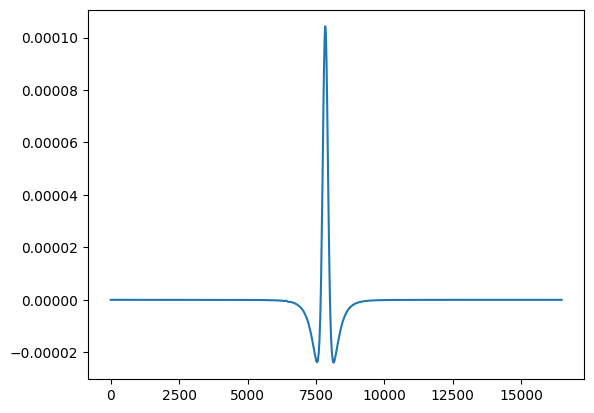

In [16]:
plt.figure()
plt.plot(np.convolve(np.ones(100),exposures[0,0]))

In [4]:
def targetFascicleActivation(currents,exposureFunctions):

    activation = exposureFunctions.T@currents
    maxActivation = np.max(activation)
    return -maxActivation # Negative sign because we want to maximize it, but Python needs to minimize it

In [5]:
def offTargetActivation(currents,exposureFunctions,targetExposures):

    activation = exposureFunctions.T @ currents
    maxActivation = np.max(activation,axis=0)

    targetActivation = targetExposures.T@currents
    maxTargetActivation = np.max(targetActivation)

    constraintsMet = maxTargetActivation - 2*maxActivation # We expect this to be non-negative
    return constraintsMet

In [6]:
fascicleList = np.arange(39)
targetFascicle = 0
offTarget = np.delete(fascicleList,targetFascicle)

optimizationCoefficients = exposures[:,targetFascicle]
boundMatrix = exposures[:,offTarget]
maxDesiredActivation = 1e-8*np.ones(38)

In [7]:
x = np.load('optimizedResult.npy',allow_pickle=True).item()['x']

In [8]:
targetFascicleActivation(x,optimizationCoefficients)

np.float64(-0.0)

In [9]:
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
offTargetActivation(x,boundMatrix,optimizationCoefficients)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [5]:
optimizationCoefficients@x

np.float64(-1.742777935556588e-05)

In [9]:
boundMatrix.T@x

array([-8.99781003e-07,  1.00000000e-08, -3.30021350e-06, -1.76677978e-05,
       -4.17253362e-06, -2.73035903e-06,  1.00000000e-08,  1.00000000e-08,
       -2.47850700e-06,  1.00000000e-08, -2.15168838e-04,  1.00000000e-08,
        1.00000000e-08,  1.00000000e-08, -9.85281394e-05, -4.11496694e-06,
       -2.32263466e-04, -4.00049510e-03, -3.87089195e-04, -9.21678336e-03,
       -5.65364395e-04, -1.68660072e-04,  1.00000000e-08, -2.81107547e-03,
       -5.80547359e-04, -1.64356054e-04, -4.29375993e-05, -3.71514162e-04,
        1.00000000e-08, -1.96698349e-04, -7.69336257e-05, -1.64633703e-04,
       -7.71913714e-05, -8.84627649e-05, -3.16591061e-05, -1.14855997e-04,
       -4.60554017e-05, -6.13002640e-05])

In [2]:
opt = np.load('optimizedResult.npy',allow_pickle=True).item()

In [3]:
opt

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -0.0
       x: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
            0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
    nfev: 61
   maxcv: -0.0